This project is a more complex analysis of Salesforce data to verify the viability of adopting a product in a company's sales operations, created during the MBA593R - Advanced Strategy Analytics course. It uses unsupervised machine learning (PCA) to compare several dimensions of different products.

# Revenue

## API

In [1]:
!pip install simple_salesforce

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.3/128.3 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.2/101.2 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.9/384.9 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
from simple_salesforce import Salesforce

In [3]:
sf1 = Salesforce(username='student@asa.com', password='BYUasa593', security_token='vnXQtfQVRQOW1UcheFqD7d4Gb')
sf1

In [4]:
sf_query = sf1.bulk.faradayta__c.query(
    """SELECT product_id__c
      , dealstage__c
      , unit_price__c
      , ordered_quantity__c
      ,  sales_rep_id__c
      , amount__c FROM faradayta__c""")

In [5]:
deals_df = pd.DataFrame(sf_query)

In [6]:
deals_df.drop(columns=['attributes'],inplace=True)

In [7]:
deals_df = deals_df.dropna()

In [8]:
def remove_suffix(column_name):
    return column_name.replace('__c', '')

deals_df = deals_df.rename(columns=remove_suffix)

## Data Cleanning

In [9]:
#Filter down to just one select product
deals_won_df =  deals_df[deals_df['dealstage'] == 'closedwon']

#Linnet Bluetooth Earbuds = 462370

ebuds_df = deals_won_df[deals_won_df['product_id'] == 462370]
swatch_df = deals_won_df[deals_won_df['product_id'] == 279721]
smonit_df = deals_won_df[deals_won_df['product_id'] == 305973]
pd.set_option('display.max_rows', 10)
smonit_df.head(93)

,product_id,dealstage,unit_price,ordered_quantity,sales_rep_id,amount
76,305973.0,closedwon,201.0,37.0,30108.0,7437.0
77,305973.0,closedwon,199.0,37.0,30108.0,7363.0
78,305973.0,closedwon,200.0,36.0,30108.0,7200.0
79,305973.0,closedwon,198.0,35.0,30108.0,6930.0
80,305973.0,closedwon,201.0,36.0,30108.0,7236.0
...,...,...,...,...,...,...
164,305973.0,closedwon,239.0,33.0,78604.0,7887.0
165,305973.0,closedwon,238.0,29.0,78604.0,6902.0
166,305973.0,closedwon,239.0,31.0,78604.0,7409.0
167,305973.0,closedwon,238.0,30.0,78604.0,7140.0


## Analysis

### Reshaping

In [10]:
import numpy as np

# Create a sample array
test_array = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])
test_array

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [11]:
test_array.reshape(4,4)

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

In [12]:
test_array.reshape(2,8)

array([[ 1,  2,  3,  4,  5,  6,  7,  8],
       [ 9, 10, 11, 12, 13, 14, 15, 16]])

In [13]:
test_array.reshape(8,2)

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10],
       [11, 12],
       [13, 14],
       [15, 16]])

In [14]:
test_array.reshape(-1,16)

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]])

In [15]:

test_array.reshape(16,1)

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16]])

In [16]:
test_array.reshape(16,-1)

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16]])

In [17]:
test_array.reshape(-1,1)

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16]])

### Regression

In [18]:
#Create two arrays for price and quantity that are shaped correctly
import numpy as np

q = np.array((ebuds_df['ordered_quantity'])).reshape((-1, 1))
p = np.array((ebuds_df['unit_price'])).reshape((-1, 1))

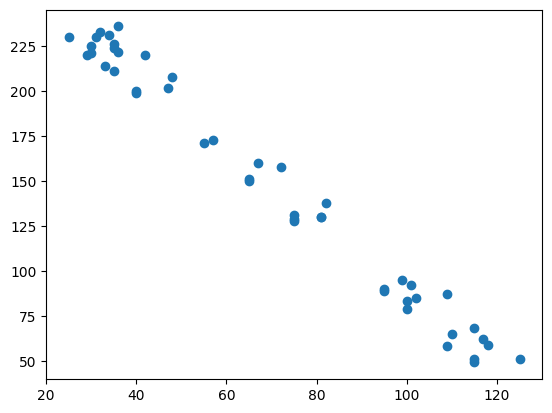

In [19]:
#Plot data points
import matplotlib.pyplot as plt

plt.scatter(p, q)
plt.show()

In [20]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(p,q)

LinearRegression()

In [21]:
model.coef_

array([[-1.99884686]])

In [22]:
model.intercept_

array([288.83249905])

In [23]:
eb_price = np.linspace(0,400,100)
eb_quant = model.predict(eb_price.reshape(-1, 1))
eb_quant = eb_quant.reshape(len(eb_quant))

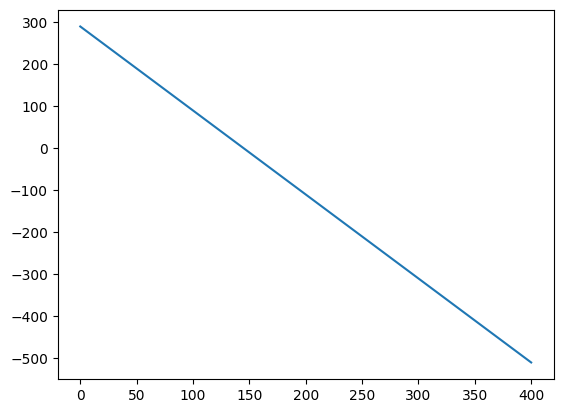

In [24]:
plt.plot(eb_price, eb_quant)

In [25]:
demandC = pd.DataFrame({'price':eb_price, 'quanity':eb_quant})
demandC['prodict'] = 'Linnet Bluetooth Earbuds'

In [26]:
eb_rev = eb_price* model.predict(eb_price.reshape(-1,1))

In [27]:
eb_rev = eb_price * eb_quant

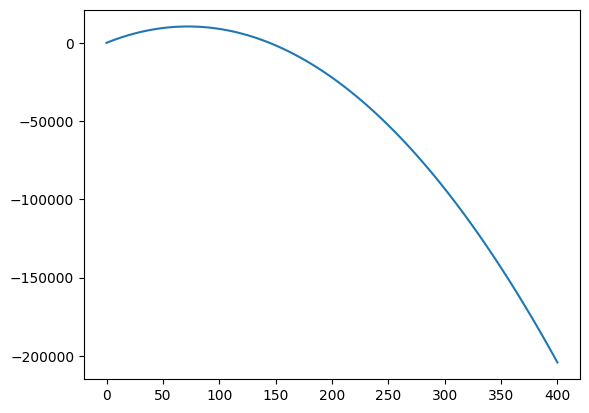

In [28]:
plt.plot(eb_price, eb_rev)

In [29]:
revC = pd.DataFrame({'price':eb_price, 'revenue':eb_rev})
revC['product'] = 'Linnet Bluetooth Earbuds'

## Revnue Function

In [30]:
import numpy as np
from sklearn.linear_model import LinearRegression

def revenueOptimizer(deals_won_df,product_id,product_name):

  product_df = deals_won_df[deals_won_df['product_id']==product_id]

  q = np.array(pd.to_numeric(product_df['ordered_quantity'])).reshape(-1, 1)
  p = np.array(pd.to_numeric(product_df['unit_price'])).reshape(-1, 1)

  model = LinearRegression()
  model.fit(p,q)

  product_price = np.linspace(0,400,401)
  product_quant = model.predict(product_price.reshape(-1, 1)).reshape(1,-1)[0]
  product_rev = product_price * product_quant

  product_demand = pd.DataFrame({'price':product_price,'quantity': product_quant, 'revenue':product_rev})

  prodcut_max = product_demand[product_demand['revenue'] == product_demand['revenue'].max()]


  product_demand['optimized_price'] = prodcut_max['price'].iloc[0]
  product_demand['optimized_quantity'] = prodcut_max['quantity'].iloc[0]
  product_demand['optimized_revenue'] = prodcut_max['revenue'].iloc[0]

  product_demand['product id'] = product_id
  product_demand['product name'] = product_id

  return(product_demand)


In [31]:
deals_won_df

,product_id,dealstage,unit_price,ordered_quantity,sales_rep_id,amount
0,462370.0,closedwon,47.0,202.0,31458.0,9494.0
1,279721.0,closedwon,109.0,124.0,30108.0,13516.0
2,279721.0,closedwon,105.0,123.0,30108.0,12915.0
3,279721.0,closedwon,108.0,124.0,30108.0,13392.0
4,279721.0,closedwon,102.0,122.0,30108.0,12444.0
...,...,...,...,...,...,...
223,462370.0,closedwon,35.0,224.0,31458.0,7840.0
224,462370.0,closedwon,42.0,220.0,31458.0,9240.0
225,462370.0,closedwon,32.0,233.0,31458.0,7456.0
226,462370.0,closedwon,36.0,222.0,31458.0,7992.0


In [32]:
deals_won_df.product_id.unique()


array([462370., 279721., 305973.])

In [33]:
revenueOptimizer(deals_won_df, 462370, 'Earbuds')

,price,quantity,revenue,optimized_price,optimized_quantity,optimized_revenue,product id,product name
0,0.0,288.832499,0.000000,72.0,144.915525,10433.917817,462370,462370
1,1.0,286.833652,286.833652,72.0,144.915525,10433.917817,462370,462370
2,2.0,284.834805,569.669611,72.0,144.915525,10433.917817,462370,462370
3,3.0,282.835958,848.507875,72.0,144.915525,10433.917817,462370,462370
4,4.0,280.837112,1123.348446,72.0,144.915525,10433.917817,462370,462370
...,...,...,...,...,...,...,...,...
396,396.0,-502.710857,-199073.499335,72.0,144.915525,10433.917817,462370,462370
397,397.0,-504.709704,-200369.752394,72.0,144.915525,10433.917817,462370,462370
398,398.0,-506.708551,-201670.003148,72.0,144.915525,10433.917817,462370,462370
399,399.0,-508.707397,-202974.251595,72.0,144.915525,10433.917817,462370,462370


## Export

In [34]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [35]:
cd '/content/drive/MyDrive/Colab Notebooks/MBA593'

/content/drive/MyDrive/Colab Notebooks/MBA593


In [36]:
demandC.to_csv('Demand_Curve.csv', index = False)

In [37]:
revC.to_csv('Revenue_Curve.csv', index = False)

# Operations

## Database Connection

In [38]:
!pip install mysql-connector-python pymysql sqlalchemy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 5.2 MB/s eta 0:00:00


In [39]:
#Setup
import pandas as pd
from sqlalchemy import text, create_engine

#Database Info
user = 'admin'
password = 'faraday593'
host = 'faraday2.cugwd6czao8r.us-east-2.rds.amazonaws.com'
port = 3306
name = 'main'

In [40]:
#SQLAlchemy Connection
db_url = f'mysql+pymysql://{user}:{password}@{host}:{port}/{name}'
engine = create_engine(db_url)
conn = engine.connect()

## Classification SQL

In [41]:
sql = """
select pp.product_id, pp.part_id, category, weight, capital_equipment_id
from parts ps
left join product_parts pp
	on ps.id = pp.part_id
left join
	(select product_id, capital_equipment_id
	from operations o
	group by product_id) oa
		on oa.product_id = pp.product_id
"""

In [42]:
df_main = pd.DataFrame(conn.execute(text(sql)))
df_main

,product_id,part_id,category,weight,capital_equipment_id
0,817036,600818,Screens,3084.430000,3.0
1,305973,705943,Circuit Boards,53.000000,NaN
2,417986,877756,Circuit Boards,47.530237,3.0
3,401198,1129939,Batteries,122.280000,2.0
4,740381,1797490,Wires,10.304100,3.0
...,...,...,...,...,...
142,128234,98439770,Speakers,2040.000000,3.0
143,646620,99152485,Wires,0.010000,1.0
144,571695,99207026,Materials,52.800000,2.0
145,279721,99325175,Circuit Boards,4.000000,NaN


In [43]:
df_parts = df_main.pivot_table(index='product_id', columns='category', values = 'weight')
df_parts

category,Batteries,Circuit Boards,Materials,Microchips,Screens,Speakers,Wires
product_id,,,,,,,
128234,25.900580,44.801807,1696.43,34.00,3084.430,2040.00,11.025387
171430,130.000000,10.000000,40.00,20.00,70.000,30.00,3.000000
181821,133.900000,10.300000,41.20,20.60,72.100,30.90,3.090000
205342,3.000000,2.000000,1.00,1.00,3.500,0.00,1.000000
279721,6.000000,4.000000,1.00,5.00,3.000,0.00,1.000000
...,...,...,...,...,...,...,...
740381,22.781000,42.863450,1711.40,34.30,3111.645,2058.00,9.967050
817036,28.231632,46.145861,1696.43,34.00,3084.430,2040.00,11.797164
819536,130.840000,28.040000,37.38,37.38,93.460,46.73,7.480000


In [44]:
df_mech = df_main[['product_id', 'capital_equipment_id']].groupby(by=['product_id']).mean()
df_mech

,capital_equipment_id
product_id,
128234,3.0
171430,2.0
181821,2.0
205342,1.0
279721,NaN
...,...
740381,3.0
817036,3.0
819536,2.0


In [45]:
df_ready = df_mech.merge(df_parts, left_index=True, right_index= True)
df_ready.to_csv('Capital_Equipment.csv', index = False)

This is what your final table should look like

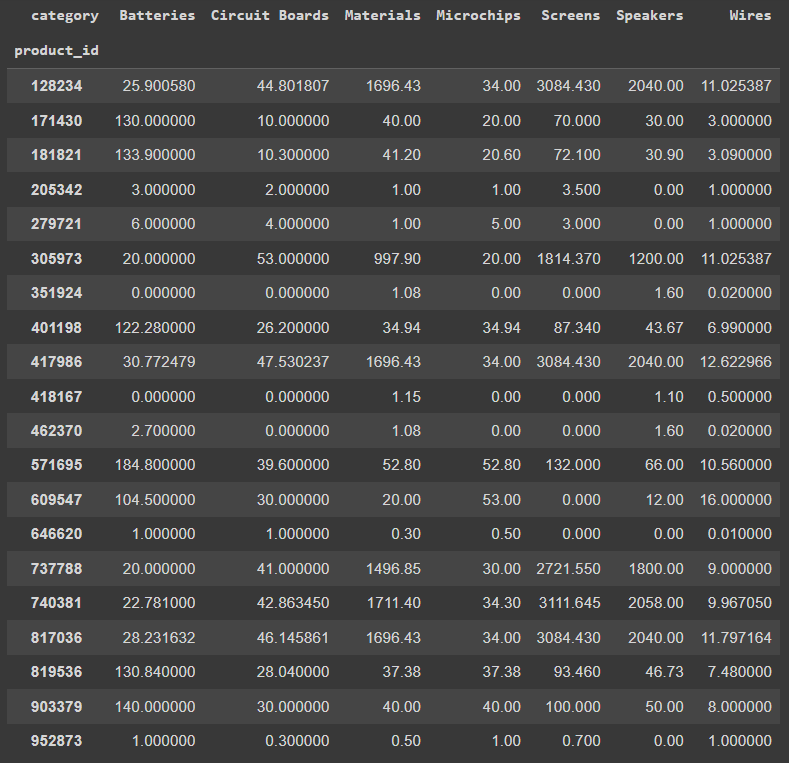

## Machine Classification

In [46]:
df_test = df_ready[df_ready['capital_equipment_id'].isnull()]
df_train = df_ready[df_ready['capital_equipment_id'].notnull()]

In [47]:
df_test

,capital_equipment_id,Batteries,Circuit Boards,Materials,Microchips,Screens,Speakers,Wires
product_id,,,,,,,,
279721,NaN,6.0,4.0,1.00,5.0,3.00,0.0,1.000000
305973,NaN,20.0,53.0,997.90,20.0,1814.37,1200.0,11.025387
462370,NaN,2.7,0.0,1.08,0.0,0.00,1.6,0.020000


In [48]:
df_train

,capital_equipment_id,Batteries,Circuit Boards,Materials,Microchips,Screens,Speakers,Wires
product_id,,,,,,,,
128234,3.0,25.900580,44.801807,1696.43,34.00,3084.430,2040.00,11.025387
171430,2.0,130.000000,10.000000,40.00,20.00,70.000,30.00,3.000000
181821,2.0,133.900000,10.300000,41.20,20.60,72.100,30.90,3.090000
205342,1.0,3.000000,2.000000,1.00,1.00,3.500,0.00,1.000000
351924,1.0,0.000000,0.000000,1.08,0.00,0.000,1.60,0.020000
...,...,...,...,...,...,...,...,...
740381,3.0,22.781000,42.863450,1711.40,34.30,3111.645,2058.00,9.967050
817036,3.0,28.231632,46.145861,1696.43,34.00,3084.430,2040.00,11.797164
819536,2.0,130.840000,28.040000,37.38,37.38,93.460,46.73,7.480000


In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
y = df_train['capital_equipment_id']
X = df_train.drop(columns=['capital_equipment_id'])

In [51]:
clf = DecisionTreeClassifier().fit(X,y)

In [52]:
X_test = df_test.drop(columns=['capital_equipment_id'])
clf.predict(X_test)

array([1., 3., 1.])

In [53]:
df_test['capital_equipment_id'] = clf.predict(X_test)
df_test

<ipython-input-53-4b1c2df5293d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['capital_equipment_id'] = clf.predict(X_test)


,capital_equipment_id,Batteries,Circuit Boards,Materials,Microchips,Screens,Speakers,Wires
product_id,,,,,,,,
279721,1.0,6.0,4.0,1.00,5.0,3.00,0.0,1.000000
305973,3.0,20.0,53.0,997.90,20.0,1814.37,1200.0,11.025387
462370,1.0,2.7,0.0,1.08,0.0,0.00,1.6,0.020000


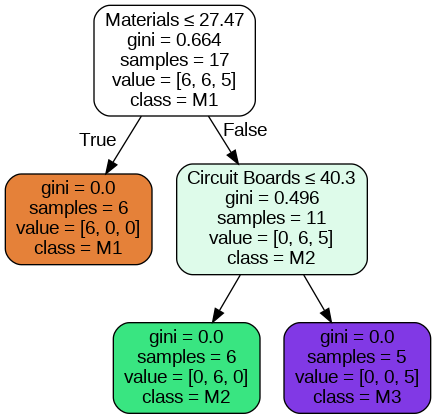

In [54]:
df_test.to_csv('CapEqClass.csv', index = False)

#view model
from IPython.display import Image
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(clf, out_file=None,
                           feature_names=X.columns, #identifying the explantory columns
                           class_names=['M1','M2','M3'], #identifying the target clasifications
                           filled=True, rounded=True,
                           special_characters=True)



graph = graphviz.Source(dot_data)

Image(graph.render("Faraday", format='png'))

## Sankey Query

In [55]:
#Setup
import pandas as pd
from sqlalchemy import text, create_engine

#Database Info
user = 'admin'
password = 'faraday593'
host = 'faraday2.cugwd6czao8r.us-east-2.rds.amazonaws.com'
port = 3306
name = 'main'

#SQL Query
query = "SELECT * FROM employees"

In [56]:
#SQLAlchemy Connection
db_url = f'mysql+pymysql://{user}:{password}@{host}:{port}/{name}'
engine = create_engine(db_url)
conn = engine.connect()

In [57]:
sql = """
WITH opps_batch AS (
	SELECT product_id
		,capital_equipment_id
	    ,SUM(batch_size) AS avg_batch_size
	FROM operations o
	GROUP BY product_id
)
select pp.part_id as "Part ID"
	, p.id as "product_id"
	, p.name as "Product",
	ps.category as "Part Type"
	, ps.costs as "Part Cost"
	, avg_batch_size as "Quantity"
	,capital_equipment_id as "Machine"
	, org.name as "Supplier"
from parts ps
left join product_parts pp
	on ps.id = pp.part_id
left join products p
	on pp.product_id = p.id
left join organizations org
	on ps.supplier_id = org.id
left join opps_batch oa
	on oa.product_id = pp.product_id
"""

In [58]:
df_sankey  = pd.DataFrame(conn.execute(text(sql)))
df_sankey['product_id'] = df_sankey['product_id'].astype(float)
df_sankey

,Part ID,product_id,Product,Part Type,Part Cost,Quantity,Machine,Supplier
0,600818,817036.0,Digital Light Processing TV,Screens,60.792020,40,3.0,Avnet Inc
1,705943,305973.0,Vasto Smart Monitor,Circuit Boards,11.443200,None,NaN,Te Connectivity ltd
2,877756,417986.0,4K TV,Circuit Boards,10.261778,20,3.0,Te Connectivity ltd
3,1129939,401198.0,Ultra mobile PC,Batteries,52.472794,2,2.0,Philips
4,1797490,740381.0,OLED TV,Wires,4.010467,10,3.0,Philips
...,...,...,...,...,...,...,...,...
142,98439770,128234.0,Plasma Display Panels,Speakers,72.950400,30,3.0,Avnet Inc
143,99152485,646620.0,Mood Ring,Wires,0.341250,70,1.0,Philips
144,99207026,571695.0,Handheld PC,Materials,77.855556,6,2.0,Avnet Inc
145,99325175,279721.0,Sidero Smartwatch,Circuit Boards,3.175000,None,NaN,Te Connectivity ltd


This is what your final table should look like

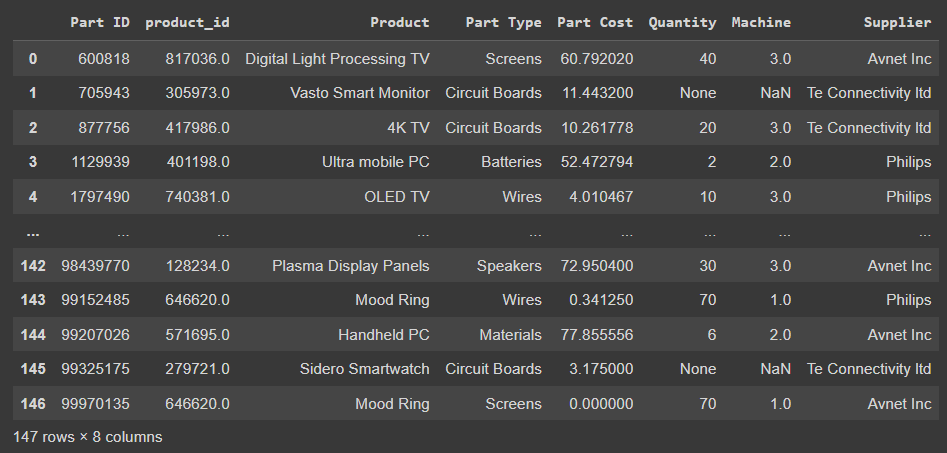

## Fill Product Data

In [59]:
df_test['capital_equipment_id'] #.reset_index()

product_id
279721    1.0
305973    3.0
462370    1.0
Name: capital_equipment_id, dtype: float64

In [60]:
df_sankey['product_id']

0      817036.0
1      305973.0
2      417986.0
3      401198.0
4      740381.0
         ...   
142    128234.0
143    646620.0
144    571695.0
145    279721.0
146    646620.0
Name: product_id, Length: 147, dtype: float64

In [61]:
right = df_test['capital_equipment_id'].reset_index()
df_sankey = df_sankey.merge(right, how = 'left', on ='product_id')
df_sankey

,Part ID,product_id,Product,Part Type,Part Cost,Quantity,Machine,Supplier,capital_equipment_id
0,600818,817036.0,Digital Light Processing TV,Screens,60.792020,40,3.0,Avnet Inc,NaN
1,705943,305973.0,Vasto Smart Monitor,Circuit Boards,11.443200,None,NaN,Te Connectivity ltd,3.0
2,877756,417986.0,4K TV,Circuit Boards,10.261778,20,3.0,Te Connectivity ltd,NaN
3,1129939,401198.0,Ultra mobile PC,Batteries,52.472794,2,2.0,Philips,NaN
4,1797490,740381.0,OLED TV,Wires,4.010467,10,3.0,Philips,NaN
...,...,...,...,...,...,...,...,...,...
142,98439770,128234.0,Plasma Display Panels,Speakers,72.950400,30,3.0,Avnet Inc,NaN
143,99152485,646620.0,Mood Ring,Wires,0.341250,70,1.0,Philips,NaN
144,99207026,571695.0,Handheld PC,Materials,77.855556,6,2.0,Avnet Inc,NaN
145,99325175,279721.0,Sidero Smartwatch,Circuit Boards,3.175000,None,NaN,Te Connectivity ltd,1.0


In [62]:
df_sankey.loc[df_sankey['Machine'].isnull(),'Machine'] = df_sankey.loc[df_sankey['Machine'].isnull(),'capital_equipment_id']

In [63]:
df_sankey

,Part ID,product_id,Product,Part Type,Part Cost,Quantity,Machine,Supplier,capital_equipment_id
0,600818,817036.0,Digital Light Processing TV,Screens,60.792020,40,3.0,Avnet Inc,NaN
1,705943,305973.0,Vasto Smart Monitor,Circuit Boards,11.443200,None,3.0,Te Connectivity ltd,3.0
2,877756,417986.0,4K TV,Circuit Boards,10.261778,20,3.0,Te Connectivity ltd,NaN
3,1129939,401198.0,Ultra mobile PC,Batteries,52.472794,2,2.0,Philips,NaN
4,1797490,740381.0,OLED TV,Wires,4.010467,10,3.0,Philips,NaN
...,...,...,...,...,...,...,...,...,...
142,98439770,128234.0,Plasma Display Panels,Speakers,72.950400,30,3.0,Avnet Inc,NaN
143,99152485,646620.0,Mood Ring,Wires,0.341250,70,1.0,Philips,NaN
144,99207026,571695.0,Handheld PC,Materials,77.855556,6,2.0,Avnet Inc,NaN
145,99325175,279721.0,Sidero Smartwatch,Circuit Boards,3.175000,None,1.0,Te Connectivity ltd,1.0


In [64]:
df_sankey.loc[df_sankey['product_id'] == 462370,'Quantity'] = round(revenueOptimizer(deals_won_df,462370,'Earbuds')['optimized_quantity'].iloc[0],0)
df_sankey.loc[df_sankey['product_id'] == 279721,'Quantity'] = round(revenueOptimizer(deals_won_df,279721,'Smartwatch')['optimized_quantity'].iloc[0],0)
df_sankey.loc[df_sankey['product_id'] == 305973,'Quantity'] = round(revenueOptimizer(deals_won_df,305973,'Smart Monitor')['optimized_quantity'].iloc[0],0)

In [65]:
df_sankey.loc[df_sankey['Quantity'].isnull(),'Quantity'] = 0

In [66]:
df_sankey['Total Cost'] = df_sankey['Quantity'].astype(float) * df_sankey['Part Cost']

In [67]:
df_sankey

,Part ID,product_id,Product,Part Type,Part Cost,Quantity,Machine,Supplier,capital_equipment_id,Total Cost
0,600818,817036.0,Digital Light Processing TV,Screens,60.792020,40,3.0,Avnet Inc,NaN,2431.680788
1,705943,305973.0,Vasto Smart Monitor,Circuit Boards,11.443200,31.0,3.0,Te Connectivity ltd,3.0,354.739200
2,877756,417986.0,4K TV,Circuit Boards,10.261778,20,3.0,Te Connectivity ltd,NaN,205.235564
3,1129939,401198.0,Ultra mobile PC,Batteries,52.472794,2,2.0,Philips,NaN,104.945587
4,1797490,740381.0,OLED TV,Wires,4.010467,10,3.0,Philips,NaN,40.104673
...,...,...,...,...,...,...,...,...,...,...
142,98439770,128234.0,Plasma Display Panels,Speakers,72.950400,30,3.0,Avnet Inc,NaN,2188.512000
143,99152485,646620.0,Mood Ring,Wires,0.341250,70,1.0,Philips,NaN,23.887500
144,99207026,571695.0,Handheld PC,Materials,77.855556,6,2.0,Avnet Inc,NaN,467.133333
145,99325175,279721.0,Sidero Smartwatch,Circuit Boards,3.175000,100.0,1.0,Te Connectivity ltd,1.0,317.500000


## To Tableau

In [68]:
df_sankey_t1 = df_sankey.copy()
df_sankey_t1['Table Name'] = 1

In [69]:
df_sankey_t2 = df_sankey.copy()
df_sankey_t2['Table Name'] = 2

In [70]:
DF_sankey = pd.concat([df_sankey_t1, df_sankey_t2])

In [71]:
DF_sankey.to_csv('Sankey_Chart.csv',index = False)

In [72]:
DF_sankey

,Part ID,product_id,Product,Part Type,Part Cost,Quantity,Machine,Supplier,capital_equipment_id,Total Cost,Table Name
0,600818,817036.0,Digital Light Processing TV,Screens,60.792020,40,3.0,Avnet Inc,NaN,2431.680788,1
1,705943,305973.0,Vasto Smart Monitor,Circuit Boards,11.443200,31.0,3.0,Te Connectivity ltd,3.0,354.739200,1
2,877756,417986.0,4K TV,Circuit Boards,10.261778,20,3.0,Te Connectivity ltd,NaN,205.235564,1
3,1129939,401198.0,Ultra mobile PC,Batteries,52.472794,2,2.0,Philips,NaN,104.945587,1
4,1797490,740381.0,OLED TV,Wires,4.010467,10,3.0,Philips,NaN,40.104673,1
...,...,...,...,...,...,...,...,...,...,...,...
142,98439770,128234.0,Plasma Display Panels,Speakers,72.950400,30,3.0,Avnet Inc,NaN,2188.512000,2
143,99152485,646620.0,Mood Ring,Wires,0.341250,70,1.0,Philips,NaN,23.887500,2
144,99207026,571695.0,Handheld PC,Materials,77.855556,6,2.0,Avnet Inc,NaN,467.133333,2
145,99325175,279721.0,Sidero Smartwatch,Circuit Boards,3.175000,100.0,1.0,Te Connectivity ltd,1.0,317.500000,2


In [73]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
cd '/content/drive/MyDrive/Colab Notebooks/MBA593'

/content/drive/MyDrive/Colab Notebooks/MBA593


In [75]:
from google.colab import files
#files.download("Sankey_Chart.csv")
DF_sankey.to_csv('Sankey1.csv', index = False)

# Market

## Web Scraping

In [76]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [77]:
url = 'https://stephenms315.github.io/ens/electronicproductreviews'

request = requests.get(url)
source = request.content
soup = BeautifulSoup(source, 'html.parser')
soup

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
<meta content="" name="description"/>
<meta content="" name="author"/>
<title>E&amp;S Electronic Reports - Product Reviews</title>
<link href="assets/favicon.ico" rel="icon" type="image/x-icon"/>
<!-- Font Awesome icons (free version)-->
<script crossorigin="anonymous" src="https://use.fontawesome.com/releases/v6.1.0/js/all.js"></script>
<!-- Google fonts-->
<link href="https://fonts.googleapis.com/css?family=Varela+Round" rel="stylesheet"/>
<link href="https://fonts.googleapis.com/css?family=Nunito:200,200i,300,300i,400,400i,600,600i,700,700i,800,800i,900,900i" rel="stylesheet"/>
<!-- Core theme CSS (includes Bootstrap)-->
<link href="css/styles.css" rel="stylesheet"/>
</head>
<body id="page-top">
<!-- Navigation-->
<nav class="navbar navbar-expand-lg navbar-light fixed-top" id="mainNav">
<div class="container px-4 px-lg-5">
<a class=

In [78]:
tables = soup.findAll('table', {'class': 'table table-bordered table-hover table-condensed'})
tables

[<table class="table table-bordered table-hover table-condensed">
 <thead><tr><th title="Field #1">Product</th>
 <th title="Field #2">Cost</th>
 <th title="Field #3">Audio Quality</th>
 <th title="Field #4">Portability</th>
 <th title="Field #5">Water-Resistance</th>
 <th title="Field #6">Battery Life</th>
 <th title="Field #7">Noise-Cancelling Microphone</th>
 <th title="Field #8">Iphone Compatibility</th>
 <th title="Field #9">Android Compatibility</th>
 <th title="Field #10">Volume</th>
 <th title="Field #11">Bluetooth</th>
 </tr></thead>
 <tbody><tr>
 <td>Linnet Bluetooth Earbuds</td>
 <td align="right">70</td>
 <td align="right">7</td>
 <td align="right">10</td>
 <td align="right">8</td>
 <td align="right">9</td>
 <td align="right">9</td>
 <td>1</td>
 <td>1</td>
 <td align="right">7</td>
 <td>1</td>
 </tr>
 <tr>
 <td>Apple AirPods</td>
 <td align="right">130</td>
 <td align="right">8</td>
 <td align="right">10</td>
 <td align="right">8</td>
 <td align="right">9</td>
 <td align="ri

In [79]:
headphones_df = pd.read_html(str(tables))[0]
smartwatches_df = pd.read_html(str(tables))[1]
smarttvs_df = pd.read_html(str(tables))[2]

In [106]:
smartwatches_df

,Product,Cost,Portability,Water-Resistance,Battery Life,Iphone Compatibility,Android Compatibility,Screen Resolution,Gamma,Bluetooth,Heartbeat,Oxygen,Apps
0,Sidero Smartwatch,120,10,9,5,1,1,3,7,1,7,6,5
1,Fitbit Versa 3,157,10,9,3,1,1,3,7,1,10,7,2
2,Apple Watch,400,10,9,5,1,0,3,7,1,10,6,7
3,SAMSUNG Galaxy Watch,309,10,9,4,1,1,3,7,1,6,0,6
4,Amazfit Bip 3 Smart Watch,59,10,5,5,1,1,3,5,1,5,0,4
5,Fitbit Inspire 2,69,10,7,7,1,1,1,3,1,7,0,0
6,ENGERWALL Fitness Tracker,19,10,2,7,1,1,1,3,1,6,0,0
7,Casio F91W-1 Classic,13,10,10,10,0,0,1,2,1,0,0,0


In [81]:
web_df = pd.DataFrame()
p = 1

for table in tables:
  temp_df = pd.read_html(str(table))[0] #table
  temp_df['Product Type' + str(p)] = 1
  web_df = pd.concat([web_df,temp_df])
  p = p + 1


web_df = web_df.fillna(0)
web_df

,Product,Cost,Audio Quality,Portability,Water-Resistance,Battery Life,Noise-Cancelling Microphone,Iphone Compatibility,Android Compatibility,Volume,...,Product Type1,Screen Resolution,Gamma,Heartbeat,Oxygen,Apps,Product Type2,Resolution,TV,Product Type3
0,Linnet Bluetooth Earbuds,70,7.0,10,8.0,9.0,9.0,1,1,7.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Apple AirPods,130,8.0,10,8.0,9.0,10.0,1,0,8.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Wired,20,7.0,9,5.0,0.0,0.0,0,1,5.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,APEKX Bluetooth Headphones,35,5.0,10,3.0,5.0,0.0,1,1,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Ltinist Wireless Earbud,30,5.0,10,3.0,5.0,0.0,1,1,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,ENGERWALL Fitness Tracker,19,0.0,10,2.0,7.0,0.0,1,1,0.0,...,0.0,1.0,3.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0
7,Casio F91W-1 Classic,13,0.0,10,10.0,10.0,0.0,0,0,0.0,...,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
0,Vasto Smart Monitor,230,0.0,1,0.0,0.0,0.0,1,1,9.0,...,0.0,9.0,9.0,0.0,0.0,3.0,0.0,9.0,1.0,1.0
1,Crystal UHD 4K Smart TV,399,0.0,1,0.0,0.0,0.0,0,0,10.0,...,0.0,10.0,10.0,0.0,0.0,0.0,0.0,10.0,1.0,1.0


## Standardization

In [82]:
from sklearn.preprocessing import MinMaxScaler

In [83]:
df = headphones_df.copy()
dfw = smartwatches_df.copy()
dfm = smarttvs_df.copy()

name_col = 'Product'
names = df[name_col]
namesw = dfw[name_col]
namesm = dfm[name_col]

0              Vasto Smart Monitor
1          Crystal UHD 4K Smart TV
2    Apple 32-inch Pro Display XDR
Name: Product, dtype: object

In [113]:
df_readym

,Cost,Portability,Iphone Compatibility,Android Compatibility,Screen Resolution,Volume,Gamma,Bluetooth,Apps,Resolution,TV
0,230,1,1,1,9,9,9,1,3,9,1
1,399,1,0,0,10,10,10,0,0,10,1
2,4999,1,1,0,8,8,9,1,2,8,1


In [84]:
df_ready = df.drop(columns = name_col)
df_readyw = dfw.drop(columns = name_col)
df_readym = dfm.drop(columns = name_col)
df_readym

,Cost,Portability,Iphone Compatibility,Android Compatibility,Screen Resolution,Volume,Gamma,Bluetooth,Apps,Resolution,TV
0,230,1,1,1,9,9,9,1,3,9,1
1,399,1,0,0,10,10,10,0,0,10,1
2,4999,1,1,0,8,8,9,1,2,8,1


In [85]:
x = MinMaxScaler().fit_transform(df_ready)
xw = MinMaxScaler().fit_transform(df_readyw)
xm = MinMaxScaler().fit_transform(df_readym)
xm

array([[0.        , 0.        , 1.        , 1.        , 0.5       ,
        0.5       , 0.        , 1.        , 1.        , 0.5       ,
        0.        ],
       [0.0354372 , 0.        , 0.        , 0.        , 1.        ,
        1.        , 1.        , 0.        , 0.        , 1.        ,
        0.        ],
       [1.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.66666667, 0.        ,
        0.        ]])

## PCA

In [86]:
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns

In [87]:
pca = PCA(n_components= 2)
pcaw = PCA(n_components= 2)
pcam = PCA(n_components= 2)

model = pca.fit_transform(x)
modelw = pcaw.fit_transform(xw)
modelm = pcam.fit_transform(xm)

pca_df = pd.DataFrame(data = model, columns= ['PC1', 'PC2'])
pca_dfw = pd.DataFrame(data = modelw, columns= ['PC1', 'PC2'])
pca_dfm = pd.DataFrame(data = modelm, columns= ['PC1', 'PC2'])
pca_dfm

,PC1,PC2
0,-0.546761,0.891900
1,1.603060,-0.170890
2,-1.056299,-0.721011


In [117]:
pca_dfw

,PC1,PC2
0,-0.737168,-0.059037
1,-0.817394,-0.174980
2,-1.058117,0.807971
3,-0.642662,-0.108389
4,-0.045445,-0.439272
5,0.828876,-0.398241
6,0.970958,-0.661474
7,1.500953,1.033421


In [88]:
loadings = pca.components_.T* np.sqrt(pca.explained_variance_)
loadingsw = pcaw.components_.T* np.sqrt(pcaw.explained_variance_)
loadingsm = pcam.components_.T* np.sqrt(pcam.explained_variance_)
loading_matrix = pd.DataFrame(loadings, columns = pca_df.columns, index = df_ready.columns)
loading_matrixw = pd.DataFrame(loadingsw, columns = pca_dfw.columns, index = df_readyw.columns)
loading_matrixm = pd.DataFrame(loadingsm, columns = pca_dfm.columns, index = df_readym.columns)


loading_matrixm

,PC1,PC2
Cost,-3.540593e-01,-4.433752e-01
Portability,1.712451e-17,6.098169e-18
Iphone Compatibility,-5.678674e-01,1.042108e-01
Android Compatibility,-1.936845e-01,5.438930e-01
Screen Resolution,4.710252e-01,1.677357e-01
...,...,...
Gamma,5.678674e-01,-1.042108e-01
Bluetooth,-5.678674e-01,1.042108e-01
Apps,-4.431398e-01,2.507716e-01
Resolution,4.710252e-01,1.677357e-01


In [89]:
loading_matrix.abs().idxmax(1).sort_values()

Cost                           PC1
Audio Quality                  PC1
Portability                    PC1
Noise-Cancelling Microphone    PC1
Volume                         PC1
Water-Resistance               PC2
Battery Life                   PC2
Iphone Compatibility           PC2
Android Compatibility          PC2
Bluetooth                      PC2
dtype: object

In [90]:
loading_matrixw.abs().idxmax(1).sort_values()

Cost                     PC1
Portability              PC1
Battery Life             PC1
Screen Resolution        PC1
Gamma                    PC1
                        ... 
Oxygen                   PC1
Apps                     PC1
Water-Resistance         PC2
Iphone Compatibility     PC2
Android Compatibility    PC2
Length: 12, dtype: object

In [91]:
loading_matrixm.abs().idxmax(1).sort_values()

Portability              PC1
Iphone Compatibility     PC1
Screen Resolution        PC1
Volume                   PC1
Gamma                    PC1
                        ... 
Apps                     PC1
Resolution               PC1
TV                       PC1
Cost                     PC2
Android Compatibility    PC2
Length: 11, dtype: object

In [92]:
loading_matrix.abs().idxmax(0).sort_index()

PC1     Portability
PC2    Battery Life
dtype: object

In [93]:
loading_matrixw.abs().idxmax(0).sort_index()

PC1        Screen Resolution
PC2    Android Compatibility
dtype: object

In [94]:
loading_matrixm.abs().idxmax(0).sort_index()

PC1                    Gamma
PC2    Android Compatibility
dtype: object

<Axes: xlabel='PC1', ylabel='PC2'>

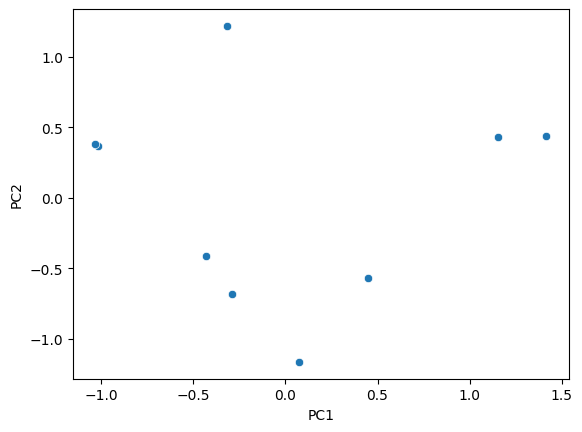

In [95]:
sns.scatterplot(data=pca_df, x='PC1', y='PC2', legend=False)

<Axes: xlabel='PC1', ylabel='PC2'>

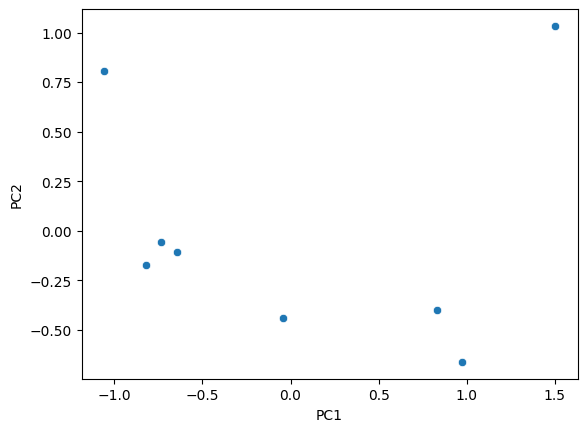

In [96]:
sns.scatterplot(data=pca_dfw, x='PC1', y='PC2', legend=False)

In [127]:
pca_dfw.to_csv('PCAW.csv', index = False)

<Axes: xlabel='PC1', ylabel='PC2'>

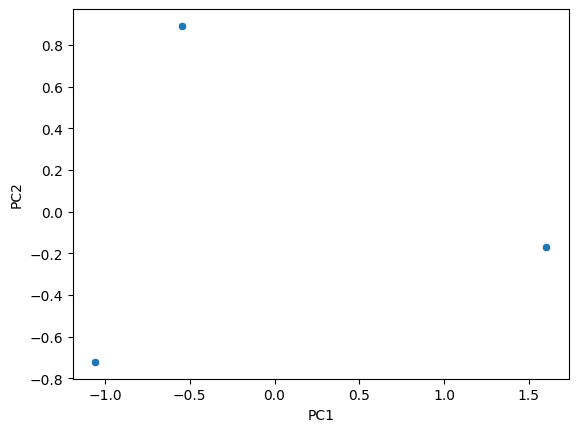

In [97]:
sns.scatterplot(data=pca_dfm, x='PC1', y='PC2', legend=False)

## Clustering

In [98]:
from sklearn.cluster import KMeans

X = pca_df
Xw = pca_dfw
Xm = pca_dfm

X

,PC1,PC2
0,-0.292058,-0.681357
1,0.074327,-1.165361
2,-0.318805,1.218600
3,-1.016772,0.368263
4,-1.031084,0.380766
5,-0.433357,-0.416849
6,0.445858,-0.572804
7,1.155709,0.431498
8,1.416182,0.437244


In [99]:
Sum_of_squared_distances = []
Sum_of_squared_distancesw = []
Sum_of_squared_distancesm = []
K = range(2,len(X)-1)
Kw = range(2,len(Xw)-1)
Km = range(2,len(Xm)-1)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

for k in Kw:
    kmw = KMeans(n_clusters=k)
    kmw = kmw.fit(Xw)
    Sum_of_squared_distancesw.append(kmw.inertia_)

for k in Km:
    kmm = KMeans(n_clusters=k)
    kmm = kmm.fit(Xm)
    Sum_of_squared_distancesm.append(kmm.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [141]:
Elbow_df = pd.DataFrame({'K': K, 'SSD': Sum_of_squared_distances})
Elbow_df['Bend'] = Elbow_df['SSD'].shift(1) - Elbow_df['SSD']
Elbow_dfw = pd.DataFrame({'K': Kw, 'SSD': Sum_of_squared_distancesw})
Elbow_dfw['Bend'] = Elbow_dfw['SSD'].shift(1) - Elbow_dfw['SSD']
Elbow_dfm = pd.DataFrame({'K': Km, 'SSD': Sum_of_squared_distancesm})
Elbow_dfm['Bend'] = Elbow_dfm['SSD'].shift(1) - Elbow_dfm['SSD']
Elbow_dfw

,K,SSD,Bend
0,2,3.373489,NaN
1,3,1.385361,1.988127
2,4,0.500034,0.885327
3,5,0.066810,0.433224
4,6,0.022071,0.044739


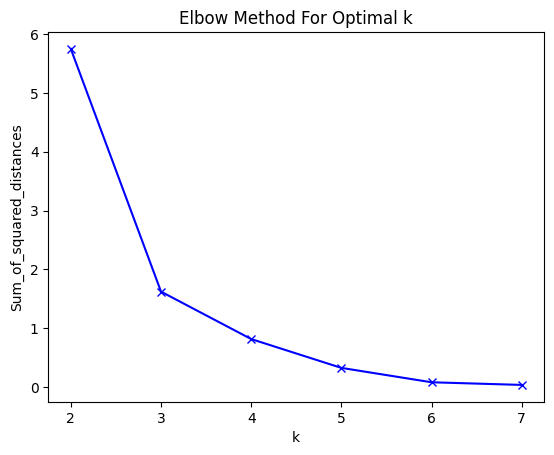

In [101]:
import matplotlib.pyplot as plt
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

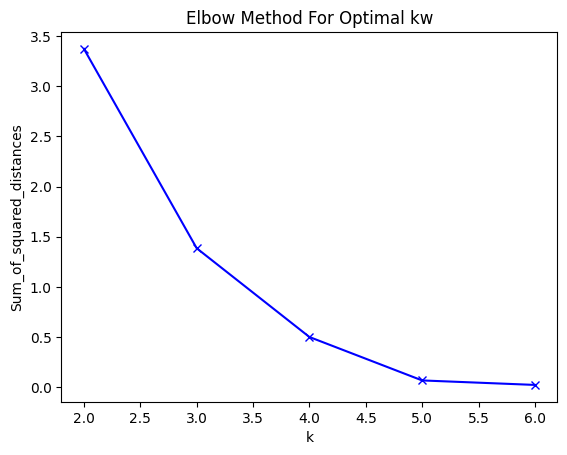

In [102]:
plt.plot(Kw, Sum_of_squared_distancesw, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal kw')
plt.show()

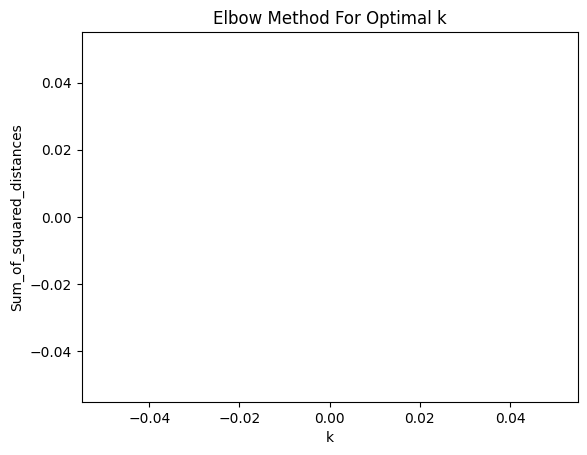

In [103]:
plt.plot(Km, Sum_of_squared_distancesm, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [136]:
try:
  k = int(Elbow_df.loc[Elbow_df['Bend'].idxmax()]['K'])
except:
  k = 1

try:
  kw = int(Elbow_dfw.loc[Elbow_dfw['Bend'].idxmax()]['Kw'])
except:
  kw = 1

try:
  kmmm = int(Elbow_dfm.loc[Elbow_dfm['Bend'].idxmax()]['Km'])
except:
  kmmm = 1

kw

1

In [120]:
km = KMeans(n_clusters=k)
y_km = km.fit_predict(X)

kmw = KMeans(n_clusters=kw)
y_kmw = kmw.fit_predict(Xw)

kmm = KMeans(n_clusters=kmmm)
y_kmm = kmm.fit_predict(Xm)

y_km

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 0, 0, 0, 2, 2, 1, 1], dtype=int32)

In [121]:
km_output = df.copy()
km_output['Group'] = y_km

km_outputw = dfw.copy()
km_outputw['Group'] = y_kmw

km_outputm = dfm.copy()
km_outputm['Group'] = y_kmm

km_outputm

,Product,Cost,Portability,Iphone Compatibility,Android Compatibility,Screen Resolution,Volume,Gamma,Bluetooth,Apps,Resolution,TV,Group
0,Vasto Smart Monitor,230,1,1,1,9,9,9,1,3,9,1,0
1,Crystal UHD 4K Smart TV,399,1,0,0,10,10,10,0,0,10,1,0
2,Apple 32-inch Pro Display XDR,4999,1,1,0,8,8,9,1,2,8,1,0


In [123]:
km_outputw

,Product,Cost,Portability,Water-Resistance,Battery Life,Iphone Compatibility,Android Compatibility,Screen Resolution,Gamma,Bluetooth,Heartbeat,Oxygen,Apps,Group
0,Sidero Smartwatch,120,10,9,5,1,1,3,7,1,7,6,5,0
1,Fitbit Versa 3,157,10,9,3,1,1,3,7,1,10,7,2,0
2,Apple Watch,400,10,9,5,1,0,3,7,1,10,6,7,0
3,SAMSUNG Galaxy Watch,309,10,9,4,1,1,3,7,1,6,0,6,0
4,Amazfit Bip 3 Smart Watch,59,10,5,5,1,1,3,5,1,5,0,4,0
5,Fitbit Inspire 2,69,10,7,7,1,1,1,3,1,7,0,0,0
6,ENGERWALL Fitness Tracker,19,10,2,7,1,1,1,3,1,6,0,0,0
7,Casio F91W-1 Classic,13,10,10,10,0,0,1,2,1,0,0,0,0


In [124]:
group_map = pd.merge(km_output, pca_df, how='inner', left_index=True, right_index=True)
group_mapw = pd.merge(km_outputw, pca_df, how='inner', left_index=True, right_index=True)
group_mapm = pd.merge(km_outputm, pca_df, how='inner', left_index=True, right_index=True)
group_map

,Product,Cost,Audio Quality,Portability,Water-Resistance,Battery Life,Noise-Cancelling Microphone,Iphone Compatibility,Android Compatibility,Volume,Bluetooth,Group,PC1,PC2
0,Linnet Bluetooth Earbuds,70,7,10,8,9,9,1,1,7,1,2,-0.292058,-0.681357
1,Apple AirPods,130,8,10,8,9,10,1,0,8,1,2,0.074327,-1.165361
2,Wired,20,7,9,5,0,0,0,1,5,0,0,-0.318805,1.218600
3,APEKX Bluetooth Headphones,35,5,10,3,5,0,1,1,3,1,0,-1.016772,0.368263
4,Ltinist Wireless Earbud,30,5,10,3,5,0,1,1,3,1,0,-1.031084,0.380766
5,Raycon Earbuds,90,7,10,7,7,6,1,1,5,1,2,-0.433357,-0.416849
6,JBL Tune 710BT,80,9,6,5,10,10,1,1,9,1,2,0.445858,-0.572804
7,Beats Wireless Headphones,100,9,6,3,0,10,1,1,10,0,1,1.155709,0.431498
8,Jabra Evolve 40 Professional Wired Headset,127,10,5,2,0,10,1,1,10,0,1,1.416182,0.437244


In [147]:
group_mapm

,Product,Cost,Portability,Iphone Compatibility,Android Compatibility,Screen Resolution,Volume,Gamma,Bluetooth,Apps,Resolution,TV,Group,PC1,PC2
0,Vasto Smart Monitor,230,1,1,1,9,9,9,1,3,9,1,0,-0.292058,-0.681357
1,Crystal UHD 4K Smart TV,399,1,0,0,10,10,10,0,0,10,1,0,0.074327,-1.165361
2,Apple 32-inch Pro Display XDR,4999,1,1,0,8,8,9,1,2,8,1,0,-0.318805,1.218600


In [137]:
group_map.to_csv('GroupMapEB.csv', index = False)
group_mapw.to_csv('GroupMapW.csv', index = False)
group_mapm.to_csv('GroupMapM.csv', index = False)

In [146]:
def calculate_y(x1, y1, x2, y2, x3):
    # Calculate the slope of the line
    m = (y2 - y1) / (x2 - x1)

    # Calculate the y-intercept of the line
    b = y1 - m * x1

    # Calculate the y-coordinate of the third point
    y3 = m * x3 + b

    return y3

# Example usage:
x1, y1 = 16.3, 136.4  # First point
x2, y2 = 222.2, 33.3  # Second point
x3 = 72.2  # Third x-coordinate

y3 = calculate_y(x1, y1, x2, y2, x3)
print(f"The y-coordinate of the point on the line is {y3}")


The y-coordinate of the point on the line is 108.40927634774161
